In [2]:
import gym
env = gym.make('CartPole-v0')

[2016-12-27 16:18:13,686] Making new env: CartPole-v0


In [185]:
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import random
random.seed(42)


In [186]:
def get_random_steps(num_episodes = 100):
    observations = []
    for _ in range(num_episodes):
        obs = env.reset()
        observations.append(obs)
        while True:
            obs, reward, is_done, _ =  env.step(env.action_space.sample())
            observations.append(obs)
            if is_done:
                break
    return observations

In [187]:
obs = get_random_steps(num_episodes = 100)

In [188]:
obs = np.array(obs)

In [189]:
obs.shape

(2378, 4)

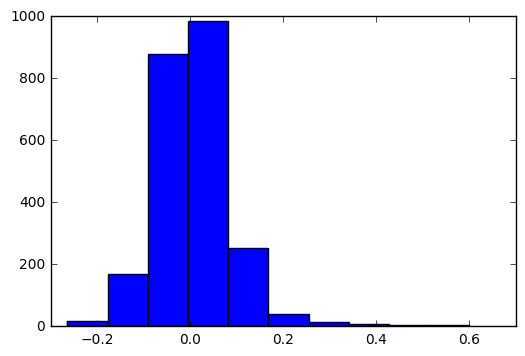

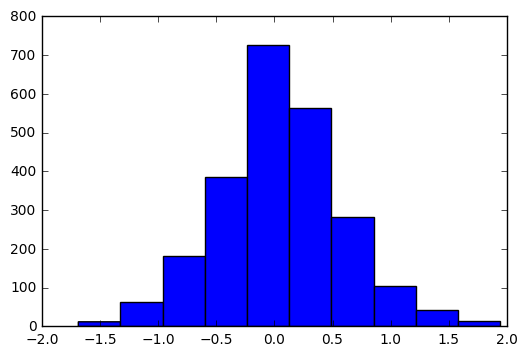

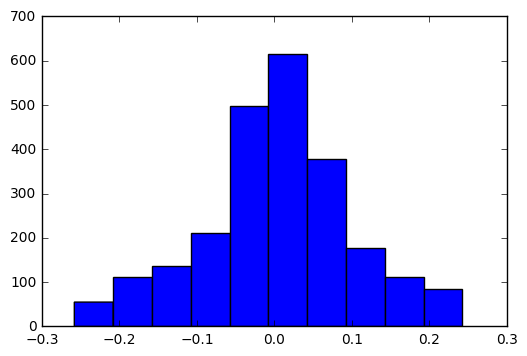

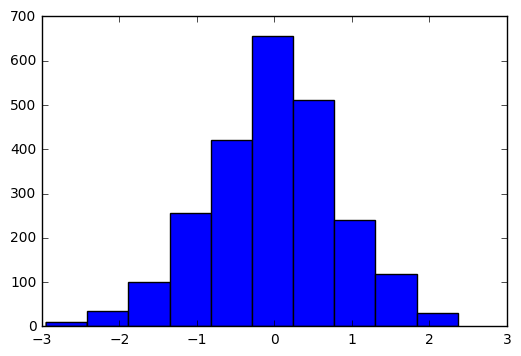

In [190]:
for i in range(4):
    plt.hist(obs[:, i], )
    plt.show()

In [209]:
num_clusters = 32
kmeans = KMeans(n_clusters = num_clusters).fit(obs)

table = np.zeros((num_clusters, 2))
num_episodes = 500
learning_rate = 0.001
gamma = 0.9
replay_memory = []
step_list = []
for episode_num in range(num_episodes):
    state = env.reset()
    eps = 1.0/(episode_num/2 + 1.0)
    steps = 0.0
    while True:
        state_cluster_id = kmeans.predict(state.reshape(1, -1))
        if random.random() < eps:
            action = env.action_space.sample()
        else:
            action = np.argmax(table[state_cluster_id])
        
        state_prime, reward, is_done, _ = env.step(action)
        state_prime_cluster_id = kmeans.predict(state_prime.reshape(1, -1))
        #update table
        table[state_cluster_id, action] += learning_rate * (reward + int(is_done) * -100 + gamma * np.max(table[state_prime_cluster_id]) - table[state_cluster_id, action])
        steps += 1
        state = state_prime
        if is_done:
            break
    step_list.append(steps)
    print 'episode', episode_num, 'steps', steps, 'eps', eps
    

episode 0 steps 14.0 eps 1.0
episode 1 steps 14.0 eps 1.0
episode 2 steps 24.0 eps 0.5
episode 3 steps 12.0 eps 0.5
episode 4 steps 17.0 eps 0.333333333333
episode 5 steps 24.0 eps 0.333333333333
episode 6 steps 18.0 eps 0.25
episode 7 steps 27.0 eps 0.25
episode 8 steps 25.0 eps 0.2
episode 9 steps 16.0 eps 0.2
episode 10 steps 40.0 eps 0.166666666667
episode 11 steps 20.0 eps 0.166666666667
episode 12 steps 54.0 eps 0.142857142857
episode 13 steps 20.0 eps 0.142857142857
episode 14 steps 15.0 eps 0.125
episode 15 steps 16.0 eps 0.125
episode 16 steps 15.0 eps 0.111111111111
episode 17 steps 15.0 eps 0.111111111111
episode 18 steps 45.0 eps 0.1
episode 19 steps 25.0 eps 0.1
episode 20 steps 14.0 eps 0.0909090909091
episode 21 steps 16.0 eps 0.0909090909091
episode 22 steps 19.0 eps 0.0833333333333
episode 23 steps 18.0 eps 0.0833333333333
episode 24 steps 43.0 eps 0.0769230769231
episode 25 steps 37.0 eps 0.0769230769231
episode 26 steps 46.0 eps 0.0714285714286
episode 27 steps 28.0 

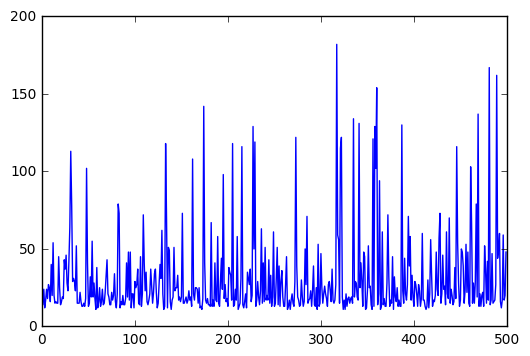

In [210]:

plt.plot(step_list)
plt.plot()
plt.show()


array([[  3.00149884e-03,   1.43228170e-01],
       [ -3.80746165e+00,  -3.95593893e+00],
       [ -7.41224128e-02,   1.17158965e-02],
       [ -2.55772332e+00,  -2.58778308e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [ -9.79983011e-02,  -8.85013219e-02],
       [  2.27289296e-02,   6.24043099e-01],
       [ -4.40615531e+00,  -4.43913540e+00],
       [ -4.48240942e+00,  -4.54647385e+00],
       [  4.00478692e-03,   0.00000000e+00],
       [  4.10719493e-02,   3.00599865e-03],
       [  2.00169974e-03,   6.25233223e-01],
       [ -9.05337084e-02,   2.10798126e-02],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [ -6.48558440e+00,  -6.49907756e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  1.46323274e+00,   1.29848413e-02],
       [  0.00000000e+00,   0.00000000e+00],
       [ -1.90260639e-01,  -1.30259454e-01],
       [  0.00000000e+00,   0.00000000e+00],
       [  